In [1]:
# Завдання 1 (Переклад тексту)

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

# Завантаження
model_name = "Helsinki-NLP/opus-mt-en-uk"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Вхідні дані
text = "A cinematic photograph of a cyberpunk raccoon hacker sitting in front of multiple screens in a dark, neon-lit room, raining outside, highly detailed, 8k"

# Токенізація
inputs = tokenizer(text, return_tensors="pt", padding=True).to(device)

# Генерація
with torch.no_grad():
    # model.generate створює послідовність токенів перекладу
    translated_tokens = model.generate(**inputs)

# Декодування
translated_text = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)

print(f"Original: {text}")
print(f"Translated: {translated_text[0]}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

source.spm:   0%|          | 0.00/809k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.01M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/305M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/305M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Original: A cinematic photograph of a cyberpunk raccoon hacker sitting in front of multiple screens in a dark, neon-lit room, raining outside, highly detailed, 8k
Translated: Кінотеатрична фотографія кіберпанка хакера єнотів, що сидить перед багатьма екранами в темній неоновій освітленій кімнаті, дощ надвір, дуже детальний, 8k


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
pip install --upgrade diffusers transformers scipy ftfy accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00


In [3]:
# Завдання 2 і 3с (Генерація картинки)

import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# Налаштування
# Використовуємо GPU. Якщо немає CUDA, код працюватиме дуже повільно на CPU.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

model_id = "runwayml/stable-diffusion-v1-5"
# model_id = "stabilityai/stable-diffusion-2-1" # Можна спробувати новішу версію

# Завантаження пайплайну
# torch_dtype=torch.float16 значно зменшує використання пам'яті GPU без втрати якості
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

# Генерація
# Ваш запит
prompt = "A cinematic photograph of a cyberpunk raccoon hacker sitting in front of multiple screens in a dark, neon-lit room, raining outside, highly detailed, 8k"

# Негативний запит
negative_prompt = "blurry, bad art, low quality, distorted face, ugly"

# Параметри генерації:
steps = 30

guidance = 7.5

print("Генерація зображення... Зачекайте.")
image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=steps,
    guidance_scale=guidance,
    height=512,
    width=512
).images[0]

output_filename = "cyberpunk_raccoon.png"
image.save(output_filename)
print(f"Зображення збережено у файл: {output_filename}")
image.show()

/usr/local/lib/python3.12/dist-packages/torch/amp/autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Using device: cpu


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Генерація зображення... Зачекайте.


  0%|          | 0/30 [00:00<?, ?it/s]

Зображення збережено у файл: cyberpunk_raccoon.png


In [4]:
# Завдання 3а (Оцінка якісті класифікації)

import pandas as pd
from transformers import pipeline
from tqdm import tqdm
from sklearn.metrics import classification_report, accuracy_score

# 1. Завантаження даних
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Беремо 50 рядків для тесту
test_df = df[:50].copy()

print(f"Завантажено {len(test_df)} рядків для тесту.")
print("Приклад даних:", test_df['label'].unique())

# МОДЕЛЬ 1: Zero-Shot
print("\n1. Запуск Zero-Shot Model (facebook/bart-large-mnli)...")
classifier_zero = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
candidate_labels = ["spam", "ham"]

# Створюємо список для результатів
preds_zero = []
for text in tqdm(test_df['message']):
    res = classifier_zero(text, candidate_labels)
    preds_zero.append(res['labels'][0])

test_df['pred_zero'] = preds_zero

# МОДЕЛЬ 2: Specialized
print("\n2. Запуск Specialized Model (mariagrandury/roberta-base-finetuned-sms-spam-detection)...")
classifier_spam = pipeline("text-classification", model="mariagrandury/roberta-base-finetuned-sms-spam-detection")

preds_spec = []
for text in tqdm(test_df['message']):
    res = classifier_spam(text, truncation=True, max_length=512)[0]
    raw_label = res['label']

    if raw_label == 'LABEL_1':
        preds_spec.append('spam')
    elif raw_label == 'LABEL_0':
        preds_spec.append('ham')
    else:
        preds_spec.append(raw_label.lower())

test_df['pred_spec'] = preds_spec


print("\n" + "="*50)
print("ПОРІВНЯННЯ РЕЗУЛЬТАТІВ")
print("="*50)

print("Приклад прогнозів:")
print(test_df[['label', 'pred_zero', 'pred_spec']].head())

print("\n Метрики Моделі 1 (Zero-Shot) ")
print(classification_report(test_df['label'], test_df['pred_zero'], zero_division=0))
acc1 = accuracy_score(test_df['label'], test_df['pred_zero'])
print(f"Accuracy: {acc1:.4f}")

print("\n Метрики Моделі 2 (Specialized) ")
print(classification_report(test_df['label'], test_df['pred_spec'], zero_division=0))
acc2 = accuracy_score(test_df['label'], test_df['pred_spec'])
print(f"Accuracy: {acc2:.4f}")

print("\n" + "="*50)
if acc2 > acc1:
    print(f"ВИСНОВОК: Спеціалізована модель перемогла (Acc: {acc2:.2f} vs {acc1:.2f})")
else:
    print(f"ВИСНОВОК: Zero-Shot модель впоралася краще або так само (Acc: {acc1:.2f} vs {acc2:.2f})")

Завантажено 50 рядків для тесту.
Приклад даних: ['ham' 'spam']

1. Запуск Zero-Shot Model (facebook/bart-large-mnli)...


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu
100%|██████████| 50/50 [03:24<00:00,  4.08s/it]



2. Запуск Specialized Model (mariagrandury/roberta-base-finetuned-sms-spam-detection)...


config.json:   0%|          | 0.00/735 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
100%|██████████| 50/50 [00:07<00:00,  6.32it/s]



ПОРІВНЯННЯ РЕЗУЛЬТАТІВ
Приклад прогнозів:
  label pred_zero pred_spec
0   ham       ham       ham
1   ham      spam       ham
2  spam       ham      spam
3   ham       ham       ham
4   ham       ham       ham

 Метрики Моделі 1 (Zero-Shot) 
              precision    recall  f1-score   support

         ham       0.74      0.65      0.69        40
        spam       0.07      0.10      0.08        10

    accuracy                           0.54        50
   macro avg       0.40      0.38      0.39        50
weighted avg       0.61      0.54      0.57        50

Accuracy: 0.5400

 Метрики Моделі 2 (Specialized) 
              precision    recall  f1-score   support

         ham       1.00      0.97      0.99        40
        spam       0.91      1.00      0.95        10

    accuracy                           0.98        50
   macro avg       0.95      0.99      0.97        50
weighted avg       0.98      0.98      0.98        50

Accuracy: 0.9800

ВИСНОВОК: Спеціалізована модель пе

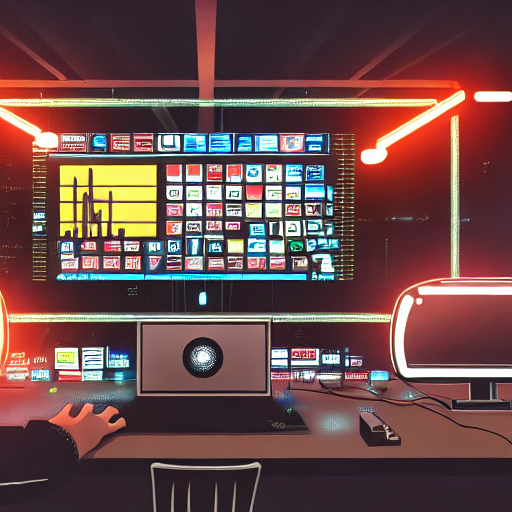

In [6]:
# Для відображення картинки прямо в ноутбуці
from IPython.display import display
display(image)